<a href="https://colab.research.google.com/github/sindla97/Machine-Learning/blob/main/NER_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing library
import pandas as pd
import numpy as np
import tensorflow as tf

In [6]:
#!pip install opendatasets

import opendatasets as od

od.download(
	"https://www.kaggle.com/datasets/naseralqaydeh/named-entity-recognition-ner-corpus")

Skipping, found downloaded files in "./named-entity-recognition-ner-corpus" (use force=True to force download)


In [7]:
# reading the XLSX file
file =('/content/named-entity-recognition-ner-corpus/ner.csv')
ner = pd.read_csv(file)

In [8]:


od.download(
"https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus?select=ner_dataset.csv")
data_path = "/content/entity-annotated-corpus/ner_dataset.csv"

data = pd.read_csv(data_path, encoding= 'unicode_escape')
# filling the first column that determines which sentence each word belongs to.
data.fillna(method = 'ffill', inplace = True)
data.head()

Skipping, found downloaded files in "./entity-annotated-corpus" (use force=True to force download)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [9]:
ner.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [10]:
def tags(text):
  text=text[2:-2]
  return text.split("', '")


ner['new_tags']=ner['Tag'].apply(tags)

In [11]:
ner['Tag'][0][2:-2].split("', '")

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-gpe',
 'O',
 'O',
 'O',
 'O',
 'O']

In [12]:
ner['POS']=ner['POS'].apply(tags)

In [13]:
ner['Sentence_tok']=ner['Sentence'].apply(lambda x : x.split() )

In [14]:
len(ner['Sentence_tok'][0]),len(ner['POS'][0]),len(ner['new_tags'][0])

(24, 24, 24)

In [15]:
ner.shape

(47959, 6)

In [16]:
wordlist=data.Word.unique()
tags=data.Tag.unique()

In [17]:
tags

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
# cutoff reviews after 110 words
maxlen = 110

max_words = 36000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(ner['Sentence_tok'])
ner['sequences_ids'] = tokenizer.texts_to_sequences(ner['Sentence_tok'])

In [20]:
 sequences_ids=pad_sequences(ner['sequences_ids'], maxlen=maxlen, padding='post')

In [21]:
#process tag ids
tag2id={}
id2tag={}
for i,k in enumerate(tags):
  id2tag[i]=k
  tag2id[k]=i

id2tag

{0: 'O',
 1: 'B-geo',
 2: 'B-gpe',
 3: 'B-per',
 4: 'I-geo',
 5: 'B-org',
 6: 'I-org',
 7: 'B-tim',
 8: 'B-art',
 9: 'I-art',
 10: 'I-per',
 11: 'I-gpe',
 12: 'I-tim',
 13: 'B-nat',
 14: 'B-eve',
 15: 'I-eve',
 16: 'I-nat'}

In [22]:
ner

,Sentence #,Sentence,POS,Tag,new_tags,Sentence_tok,sequences_ids
0,Sentence: 1,Thousands of demonstrators have marched throug...,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[Thousands, of, demonstrators, have, marched, ...","[253, 5, 966, 15, 1794, 237, 467, 6, 522, 1, 1..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[Families, of, soldiers, killed, in, the, conf...","[1147, 5, 148, 39, 4, 1, 505, 1088, 1, 585, 53..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo...","[They, marched, from, the, Houses, of, Parliam...","[47, 1794, 21, 1, 2014, 5, 247, 6, 7, 1164, 4,..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[Police, put, the, number, of, marchers, at, 1...","[58, 707, 1, 276, 5, 7718, 19, 2031, 188, 2613..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,...","[The, protest, comes, on, the, eve, of, the, a...","[1, 522, 539, 12, 1, 2131, 5, 1, 927, 453, 5, ..."
...,...,...,...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"[JJ, NN, NN, NNS, VBP, VBG, PRP$, JJ, NNS, IN,...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe...","[B-gpe, O, O, O, O, O, O, B-gpe, O, O, O, O, O...","[Indian, border, security, forces, are, accusi...","[365, 194, 63, 73, 29, 2153, 59, 268, 3941, 5,..."
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"[JJ, NNS, VBD, DT, NN, VBD, VBN, IN, NNP, POS,...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...","[B-gpe, O, O, O, O, O, O, O, B-tim, O, O, O, O...","[Indian, officials, said, no, one, was, injure...","[365, 35, 17, 121, 61, 18, 521, 4, 93, 9, 444,..."
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"[CD, JJR, VBD, IN, NNS, VBG, TO, DT, JJ, NN, .]","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O]","[Two, more, landed, in, fields, belonging, to,...","[40, 48, 2715, 4, 3098, 3328, 6, 7, 1186, 809, 2]"
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"[PRP, VBP, RB, DT, IN, DT, NNS, VBD, IN, NN, .]","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O]","[They, say, not, all, of, the, rockets, explod...","[47, 26, 43, 152, 5, 1, 1367, 752, 1401, 1984, 2]"


In [23]:
def process_tags(lst):
  max_length=110
  processtags=[]
  for i in range(len(lst)):
    processtags.append(tag2id[lst[i]])
  processtags +=([0]*(max_length-i-1))

  return np.asarray(processtags)

ner['new_tags2']=ner['new_tags'].apply(process_tags)


In [24]:
y_processed=pad_sequences(ner['new_tags2'], maxlen=maxlen, padding='post')

In [25]:
from tensorflow.keras.utils import to_categorical
y_processed=to_categorical(y_processed)


In [26]:
#y_processed=ner['new_tags2']
y_processed

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [27]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding
from tensorflow.keras.optimizers import Adam

In [28]:
sequences_ids = np.asarray(sequences_ids)
y_processed = np.asarray(y_processed)


In [29]:
sequences_ids

array([[ 253,    5,  966, ...,    0,    0,    0],
       [1147,    5,  148, ...,    0,    0,    0],
       [  47, 1794,   21, ...,    0,    0,    0],
       ...,
       [  40,   48, 2715, ...,    0,    0,    0],
       [  47,   26,   43, ...,    0,    0,    0],
       [ 365,   73,   17, ...,    0,    0,    0]], dtype=int32)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sequences_ids,y_processed, test_size=.50)

train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))

valid_data = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [31]:
y_train.shape

(23979, 110, 17)

In [33]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_data = train_data.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
valid_data = valid_data.batch(BATCH_SIZE)
#test_data = test_data.batch(BATCH_SIZE)

In [34]:
train_data.element_spec

(TensorSpec(shape=(None, 110), dtype=tf.int32, name=None),
 TensorSpec(shape=(None, 110, 17), dtype=tf.float32, name=None))

In [42]:
def model():
  inputs=Input(shape=(110,), dtype=tf.int32)
  embeddings=tf.keras.layers.Embedding(36000, 200)(inputs)
  lstm=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True))(embeddings)
  lstm2=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True))(lstm)
  output= tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(17, activation='softmax'))(lstm2)
  model=tf.keras.Model(inputs,output)
  return model

In [32]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy', dtype=None)

In [43]:
model=model()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 110)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 110, 200)          7200000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 110, 200)          240800    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 110, 200)          240800    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 110, 17)           3417      
 stributed)                                                      
                                                           

In [37]:
epochs = 5
steps_per_epoch = 50
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

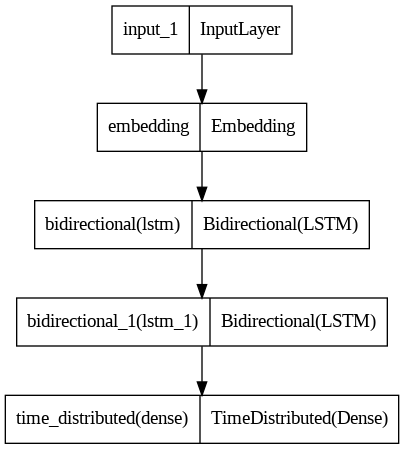

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23979, 110)
(23979, 110, 17)
(23980, 110)
(23980, 110, 17)


In [44]:
history=model.fit(train_data,
                    validation_data=valid_data,
                    epochs=5,batch_size=132)

Epoch 1/5
182/182 [==============================] - 450s 2s/step - loss: 0.2167 - acc: 0.9643 - val_loss: 0.0984 - val_acc: 0.9719
Epoch 2/5
182/182 [==============================] - 387s 2s/step - loss: 0.0727 - acc: 0.9777 - val_loss: 0.0600 - val_acc: 0.9820
Epoch 3/5
182/182 [==============================] - 430s 2s/step - loss: 0.0425 - acc: 0.9880 - val_loss: 0.0393 - val_acc: 0.9894
Epoch 4/5
182/182 [==============================] - 373s 2s/step - loss: 0.0265 - acc: 0.9926 - val_loss: 0.0347 - val_acc: 0.9905
Epoch 5/5
182/182 [==============================] - 371s 2s/step - loss: 0.0210 - acc: 0.9941 - val_loss: 0.0347 - val_acc: 0.9908


In [49]:
valid_y_pred=model.predict(valid_data)

182/182 [==============================] - 96s 530ms/step


In [71]:
y_test

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [50]:
from sklearn.metrics import classification_report
def classification_report(valid_y_pred,y_test):
  big_lst
  for i in range(110):
    lst=[]
    for j in range(110):
      lst.append(np.argmax(valid_y_pred[i,j,:]))
    lst=np.array(lst)
    big_lst.append(lst)
  big_lst=np.array(big_lst)
  return classification_report=(big_lst,y_test)

classification_report(valid_y_pred,y_test)



array([[[9.99306202e-01, 4.08898268e-05, 5.51675789e-08, ...,
         1.76631584e-05, 3.99466153e-05, 4.43147883e-06],
        [9.99730349e-01, 1.75774749e-05, 1.87897573e-08, ...,
         4.96373104e-06, 4.81559391e-06, 8.60320142e-07],
        [9.99804735e-01, 1.42496265e-05, 1.19279013e-08, ...,
         3.89527440e-06, 3.58266129e-06, 6.53354562e-07],
        ...,
        [9.99987304e-01, 1.82297538e-06, 3.73257558e-09, ...,
         1.00532120e-07, 2.64354355e-07, 3.39558959e-08],
        [9.99954641e-01, 5.19802325e-06, 2.78117387e-08, ...,
         5.22161088e-07, 1.09630867e-06, 1.89104114e-07],
        [9.99299049e-01, 5.54923645e-05, 1.56365763e-06, ...,
         1.71011416e-05, 2.39084293e-05, 6.72771330e-06]],

       [[9.99541938e-01, 2.29202851e-05, 3.25010561e-08, ...,
         1.15971934e-05, 2.93084449e-05, 3.25618021e-06],
        [9.99876022e-01, 9.15101737e-06, 6.40710640e-09, ...,
         1.75897696e-06, 2.11133829e-06, 2.90863369e-07],
        [9.98227358e-01, 